In [2]:
import os   #used for directory work

import matplotlib.pyplot as plt #used for creating plots
#import metpy
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
#path = "/Users/joeyp/Desktop/Large-Scale-SERDP-Burns/March-2019-Large-Scale-Experiment-Cleaned-Data/"
def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    return txt_files
#txt_files = text_finder(path)

In [10]:
for i in range(len(txt_files)):
    print(i,":",txt_files[i])

0 : burn-control_tower.txt
1 : burn-east_tower.txt
2 : burn-flux_tower.txt
3 : burn-mobile_tower.txt
4 : burn-north_tower.txt
5 : burn-west_tower.txt
6 : post-burn-control_tower.txt
7 : post-burn-east_tower.txt
8 : post-burn-flux_tower.txt
9 : post-burn-mobile_tower.txt
10 : post-burn-north_tower.txt
11 : post-burn-west_tower.txt
12 : pre-burn-control_tower.txt
13 : pre-burn-east_tower.txt
14 : pre-burn-flux_tower.txt
15 : pre-burn-north_tower.txt
16 : pre-burn-west_tower.txt


In [11]:
df_pre_east = pd.read_csv(path + txt_files[-4],na_values = ['NAN', "00nan"],sep = " ")
df_brn_east = pd.read_csv(path + txt_files[1],na_values = ['NAN', "00nan"],sep = " ")
df_pst_east = pd.read_csv(path + txt_files[7],na_values = ['NAN', "00nan"],sep = " ")

df_pre_north = pd.read_csv(path + txt_files[15],na_values = ['NAN', "00nan"],sep = " ")
df_brn_north = pd.read_csv(path + txt_files[4],na_values = ['NAN', "00nan"],sep = " ")
df_pst_north = pd.read_csv(path + txt_files[10],na_values = ['NAN', "00nan"],sep = " ")

#vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)
#print(df_pre_east.columns)

In [37]:
df_pre_flux = pd.read_csv(path + txt_files[14],na_values = ['NAN', "00nan"],sep = " ")
df_brn_flux = pd.read_csv(path + txt_files[2],na_values = ['NAN', "00nan"],sep = " ")
df_pst_flux = pd.read_csv(path + txt_files[8],na_values = ['NAN', "00nan"],sep = " ")

In [27]:
def wind_directions(df):
    x_col, y_col = ["U(19m)", "U(9.5m)", "U(3m)"], ["V(19m)", "V(9.5m)", "V(3m)"]
    D_19, D_09, D_03 = [],[],[]
    for i in range(len(df)):
        D_19.append( np.arctan2(df[y_col[0]][i], df[x_col[0]][i])*180/np.pi)
        D_09.append( np.arctan2(df[y_col[1]][i], df[x_col[1]][i])*180/np.pi)
        D_03.append( np.arctan2(df[y_col[2]][i], df[x_col[2]][i])*180/np.pi)
    return D_19, D_09, D_03

In [28]:
def plotting(df_pre,df_brn,df_pst):
    pre_x = np.arange(len(df_pre))
    brn_x = np.arange(len(df_brn))
    pst_x = np.arange(len(df_pst))
    
    pre_D_19, pre_D_09, pre_D_03 = wind_directions(df_pre)
    brn_D_19, brn_D_09, brn_D_03 = wind_directions(df_brn)
    pst_D_19, pst_D_09, pst_D_03 = wind_directions(df_pst)

    fig, axs = plt.subplots(nrows = 1,ncols=3,figsize=(20,10), sharey = True)
    axs1 = axs[0]
    axs1.scatter(pre_x, pre_D_19, s=.1)
    axs1.scatter(pre_x, pre_D_09, s=.1)
    axs1.scatter(pre_x, pre_D_03, s=.1)

    axs2 = axs[1]
    axs2.scatter(brn_x, brn_D_19, s=.1)
    axs2.scatter(brn_x, brn_D_09, s=.1)
    axs2.scatter(brn_x, brn_D_03, s=.1)

    axs2 = axs[2]
    axs2.scatter(pst_x, pst_D_19, s=.1)
    axs2.scatter(pst_x, pst_D_09, s=.1)
    axs2.scatter(pst_x, pst_D_03, s=.1)
    fig.tight_layout()
    plt.show()

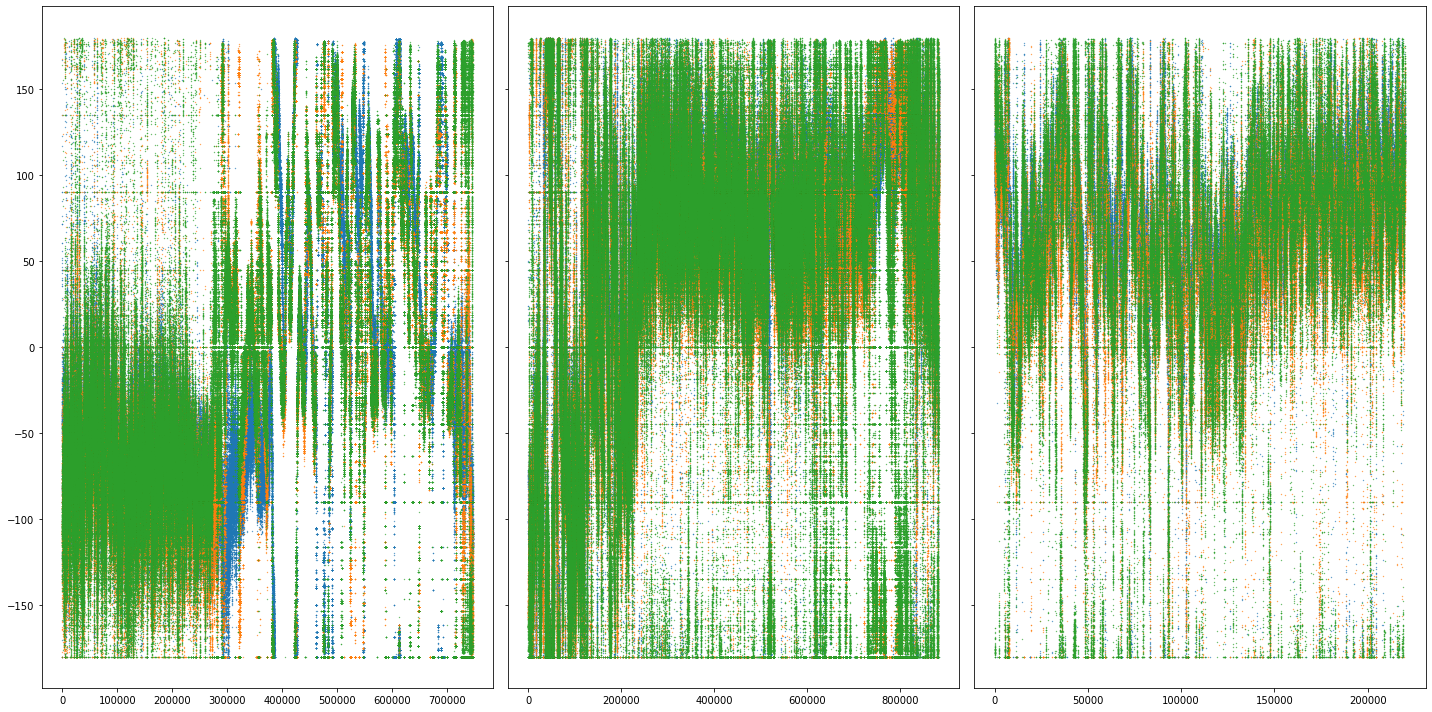

In [29]:
plotting(df_pre_east, df_brn_east, df_pst_east)
#plotting(df_pre_north, df_brn_north, df_pst_north)
#plotting(df_pre_flux, df_brn_flux, df_pst_flux)

In [43]:
print("Pre-Flux 19m",np.mean(df_pre_flux["U(19m)"]))
print("Brn-Flux 3m",np.mean(df_brn_flux["U(3m)"]))
print("Brn-Flux 9.5m", np.mean(df_brn_flux["U(9.5m)"]))
print("Pst-Flux 19m",np.mean(df_pst_flux["U(19m)"]))

Pre-Flux 19m 0.6228929466001442
Brn-Flux 3m 0.03582697329889369
Brn-Flux 9.5m 0.11458884755473171
Pst-Flux 19m -2.5139875363828894


In [44]:
df_pre_flux["U(19m)"] = [x * -1 for x in list(df_pre_flux["U(19m)"])]
df_pst_flux["U(19m)"] = [x * -1 for x in list(df_pst_flux["U(19m)"])]
df_brn_flux["U(3m)"] = [x * -1 for x in list(df_brn_flux["U(3m)"])]
df_brn_flux["U(9.5m)"] = [x * -1 for x in list(df_brn_flux["U(9.5m)"])]

In [45]:
print("Pre-Flux 19m",np.mean(df_pre_flux["U(19m)"]))
print("Brn-Flux 3m",np.mean(df_brn_flux["U(3m)"]))
print("Brn-Flux 9.5m", np.mean(df_brn_flux["U(9.5m)"]))
print("Pst-Flux 19m",np.mean(df_pst_flux["U(19m)"]))

Pre-Flux 19m -0.6228929466001442
Brn-Flux 3m -0.03582697329889369
Brn-Flux 9.5m -0.11458884755473171
Pst-Flux 19m 2.5139875363828894


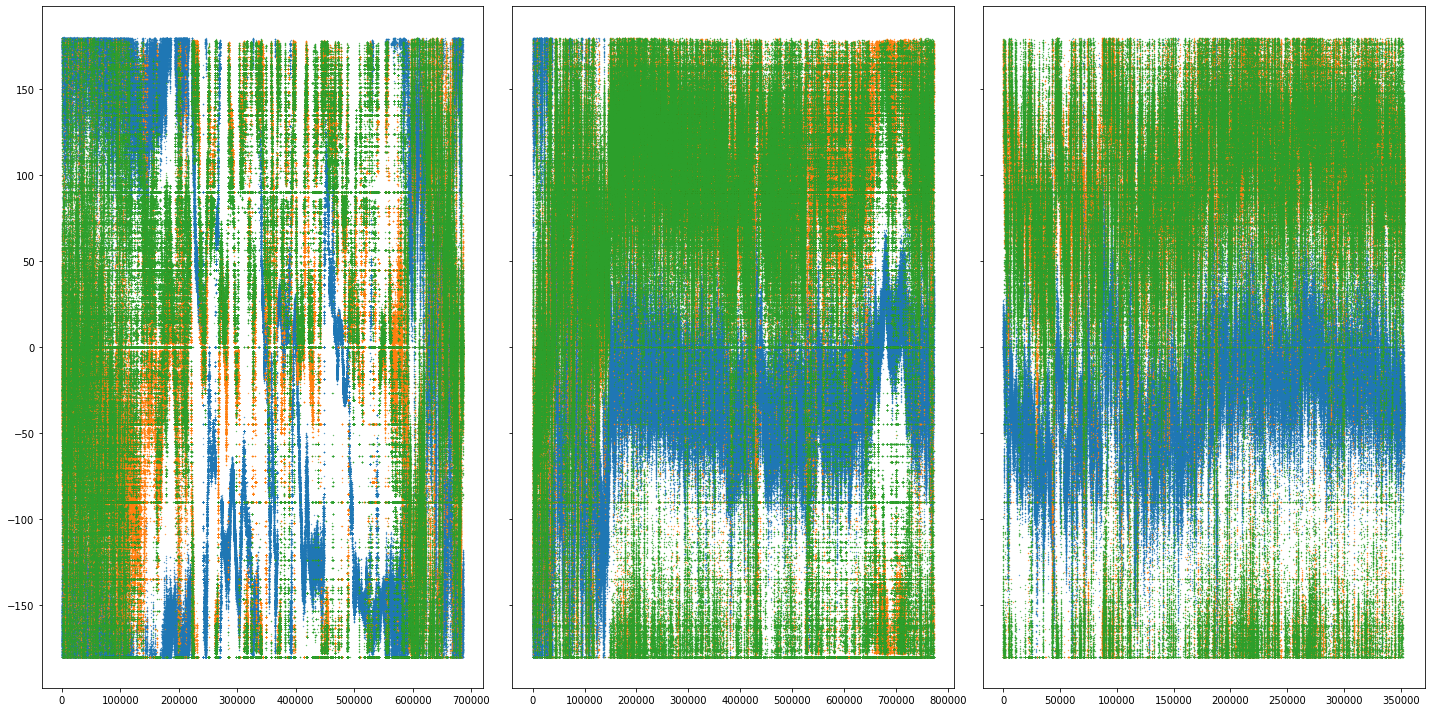

In [46]:
plotting(df_pre_flux, df_brn_flux, df_pst_flux)


## 10x10 Truss Burns

In [1]:
import os   #used for directory work
import matplotlib.pyplot as plt #used for creating plots
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    return txt_files

In [20]:
path_01 = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-07/sonics/"
path_02 ="/home/joey/Desktop/Data-Cleaning-Code/Burn-07/sonics/"
cl = list("g"*4+"b"*4+"r"*4+"c"*4)
labels= list("A"*4+"B"*4+"C"*4+"D"*4)

In [21]:
def truss_wind_dir(df):
    D = []
    for i in range(len(df)):
        D.append( np.arctan2(df["V"][i], df["U"][i])*180/np.pi)
    return D

In [34]:
def plot_wind_10truss(path):
    files = text_finder(path)
    plt.figure(figsize = (10,6))
    for i in range(16):
        df = pd.read_csv(path + files[i],na_values = ['NAN', "00nan"],sep = " ")
        x = np.arange(len(df))
        plt.scatter(x,truss_wind_dir(df), s = .1, c = cl[i],label = labels[i])
    plt.legend(markerscale=6)

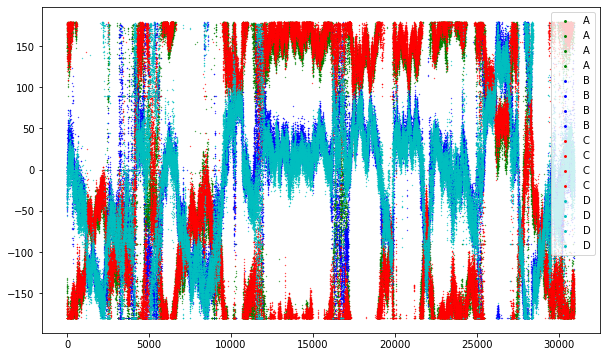

In [35]:
plot_wind_10truss(path_01)

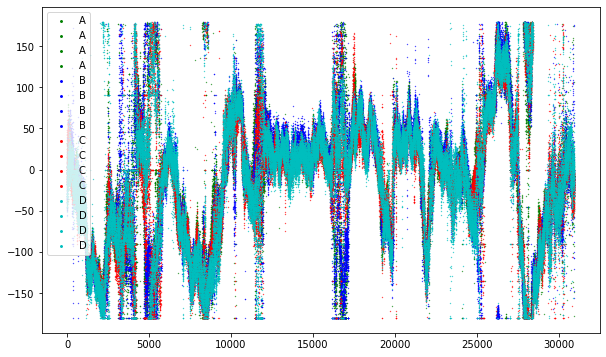

In [36]:
plot_wind_10truss(path_02)

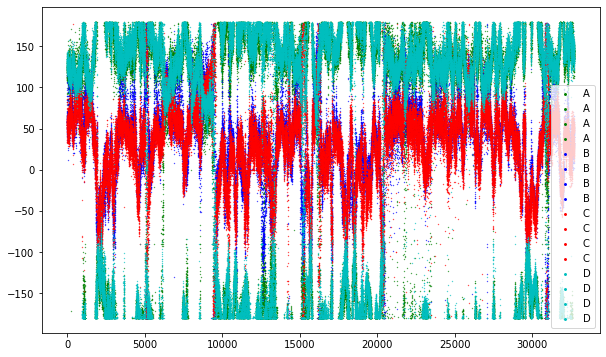

In [37]:
path_03 = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-08/sonics/"
path_04 ="/home/joey/Desktop/Data-Cleaning-Code/Burn-08/sonics/"
plot_wind_10truss(path_03)

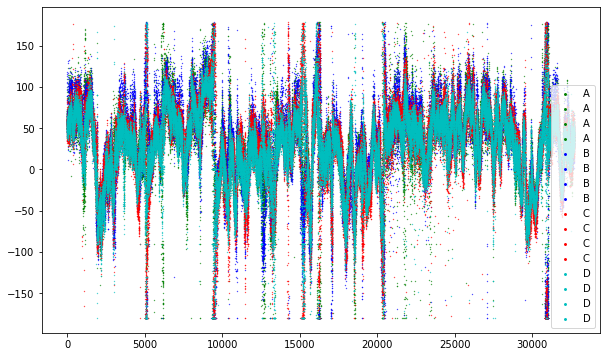

In [40]:
plot_wind_10truss(path_04)

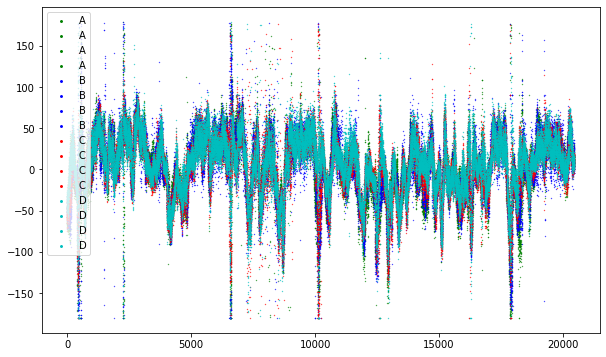

In [41]:
path_06 = "/home/joey/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-06/sonics/"
#path_04 ="/home/joey/Desktop/Data-Cleaning-Code/Burn-06/sonics/"
plot_wind_10truss(path_06)